### Step 1: Load and Inspect the Data

This section imports both datasets to begin understanding structure, types, and potential cleaning needs.


In [34]:
# notebooks/capstone_analysis.ipynb (start your notebook here)

import pandas as pd

# Flights Dataset
flights_df = pd.read_csv('../data/flight_data_usa.csv')

# Quick peek
print("Flight Data Preview:")
display(flights_df.head())

# Hotels Dataset
hotels_df = pd.read_csv('../data/hotels_usa.csv')

# Quick peek
print("Hotel Data Preview:")
display(hotels_df.head())



Flight Data Preview:


,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,ALG,Algeria,ATL,United States,Airbus A321neo|Airbus A330,LH,[Lufthansa],LH1317|LH1317,4/30/2022 12:35,5/1/2022 14:15,1840,1,693.0,USD,842000.0,871000.0,-3%,4/29/2022 17:52
1,ALG,Algeria,ATL,United States,Airbus A321neo|Boeing 777|Embraer 175,multi,[Lufthansa| Air Canada],LH1317|LH1317|LH1317,4/30/2022 12:35,5/1/2022 19:00,2125,2,720.0,USD,1000000.0,871000.0,14%,4/29/2022 17:52
2,ALG,Algeria,ATL,United States,Airbus A321neo|Boeing 767|Airbus A319,multi,[Lufthansa| United],LH1317|LH1317|LH1317,4/30/2022 12:35,4/30/2022 23:59,984,2,900.0,USD,980000.0,871000.0,12%,4/29/2022 17:52
3,ALG,Algeria,ATL,United States,Airbus A321neo|Boeing 787|Boeing 737,multi,[Lufthansa| United],LH1317|LH1317|LH1317,4/30/2022 12:35,5/1/2022 17:01,2006,2,698.0,USD,974000.0,871000.0,11%,4/29/2022 17:52
4,ALG,Algeria,ATL,United States,Airbus A321neo|Boeing 767|Embraer 175,multi,[Lufthansa| United],LH1317|LH1317|LH1317,4/30/2022 12:35,5/1/2022 14:50,1875,2,707.0,USD,975000.0,871000.0,11%,4/29/2022 17:52


Hotel Data Preview:


,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
0,US,United States,100328,"Abbeville, Louisiana",1094195,Sunbelt Lodge Motel,TwoStar,1903 Veterans Memorial Drive AbbevilleLouisian...,NaN,Sunbelt Lodge Motel is a 2-star property situa...,+13378981463,shared lounge/TV area meeting/banquet faciliti...,29.9806|-92.11452,+13378981453,LA 70510,https://www.booking.com/hotel/us/sunbelt-lodge...
1,US,United States,100328,"Abbeville, Louisiana",1125999,Budget Inn & Suites,TwoStar,2115 Charity Street AbbevilleLouisiana 70510,NaN,Offering a free continental breakfast and an o...,+1(0)3374224699,24-hour front desk Non-smoking rooms Laundry F...,29.97315|-92.11281,1-337-8989770,LA 70510,https://www.booking.com/hotel/us/budget-inn-am...
2,US,United States,100328,"Abbeville, Louisiana",1179258,Best Western Abbeville Inn & Suites,TwoStar,3515 Veterans Memorial Dr Abbeville AbbevilleL...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Abbeville General Hospital<...,1-337-740-4101,Wheelchair accessible (may have limitations) V...,29.967878|-92.08536,1-337-740-4100,70510,http://bestwesternlouisiana.com/hotels/best-we...
3,US,United States,100328,"Abbeville, Louisiana",1250024,Motel 6 Abbeville LA,TwoStar,3523 Veterans Memorial Drive AbbevilleLouisian...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Abbeville General Hospital<...,1-337-898-2399,Wheelchair accessible (may have limitations) W...,29.968056|-92.08443,+1 337 898 3180,70510,https://www.motel6.com/content/g6/motel6/motel...
4,US,United States,100328,"Abbeville, Louisiana",1366117,Days Inn by Wyndham Abbeville,TwoStar,730 Veterans Memorial Dr AbbevilleLouisiana 70...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Abbeville General Hospital<...,1-337-7404667,Express check-out Multilingual staff 24-hour f...,29.981226|-92.12469,1-337-7404666,70510,http://www.executiveinnexpress.com/


### Step 2: Organize and Filter Data

This section filters data to US cities in the Flights dataset, lining up with the Hotels dataset.

In [35]:
# Redefine the airport-to-city/state mapping
airport_to_city_state = {
    'ATL': 'Atlanta,   Georgia',
    'CLT': 'Charlotte,   North Carolina',
    'FLL': 'Fort Lauderdale,   Florida',
    'IAH': 'Houston,   Texas',
    'JFK': 'New York,   New York',
    'LAX': 'Los Angeles,   California',
    'MCO': 'Orlando,   Florida',
    'MIA': 'Miami,   Florida',
    'ORD': 'Chicago,   Illinois',
    'PHX': 'Phoenix,   Arizona',
    'SEA': 'Seattle,   Washington',
    'SFO': 'San Francisco,   California',
}

hotel_rating = {
    'OneStar': 1,
    'TwoStar': 2,
    'ThreeStar': 3,
    'FourStar': 4,
    'FiveStar': 5,
    'All': 0,
}

hotels_df[' HotelRating'] = hotels_df[' HotelRating'].map(hotel_rating)

In [36]:
import sqlite3
import pandas as pd

# Step 1: Create SQLite connection
conn = sqlite3.connect("../data/vacation_data.db")

# Step 2: Save dataframes to SQL tables
flights_df.to_sql("flights", conn, if_exists="replace", index=False)
hotels_df.to_sql("hotels", conn, if_exists="replace", index=False)

# Step 3: Create airport-to-city-state mapping table
airport_map_df = pd.DataFrame([
    {'dest_airport_code': k, 'City_State': v.strip()}
    for k, v in airport_to_city_state.items()
])
airport_map_df.to_sql("airport_map", conn, if_exists="replace", index=False)

# Step 4: SQL query to generate the city rating table
query = """
WITH flights_mapped AS (
    SELECT
        am.City_State,
        f.price
    FROM flights f
    JOIN airport_map am ON f.dest_airport_code = am.dest_airport_code
),
hotels_cleaned AS (
    SELECT
        TRIM(h." cityName") AS City_State,
        h." HotelRating" AS HotelRating
    FROM hotels h
    WHERE h." HotelRating" IS NOT NULL
)
SELECT
    f.City_State,
    ROUND(AVG(f.price), 2) AS AverageFlightPrice,
    ROUND(AVG(h.HotelRating), 3) AS AverageHotelRating
FROM flights_mapped f
JOIN hotels_cleaned h ON f.City_State = h.City_State
GROUP BY f.City_State
ORDER BY f.City_State;
"""

# Step 5: Load results into a DataFrame
city_rating_table = pd.read_sql_query(query, conn)

# Step 6: Format columns for display
city_rating_table['AverageFlightPrice'] = city_rating_table['AverageFlightPrice'].apply(
    lambda x: f"${x:,.2f}" if pd.notnull(x) else x
)
city_rating_table['AverageHotelRating'] = city_rating_table['AverageHotelRating'].apply(
    lambda x: f"{x:.3f}" if pd.notnull(x) else x
)

# Step 7: Display
display(city_rating_table)

# Step 8: Close connection
conn.close()

,City_State,AverageFlightPrice,AverageHotelRating
0,"Atlanta, Georgia","$2,336.02",2.566
1,"Charlotte, North Carolina","$2,250.21",2.290
2,"Chicago, Illinois","$2,104.47",2.722
3,"Fort Lauderdale, Florida","$1,980.00",2.476
4,"Houston, Texas","$2,321.60",2.278
5,"Los Angeles, California","$1,815.57",2.321
6,"Miami, Florida","$1,782.83",2.724
7,"New York, New York","$1,954.97",2.860
8,"Orlando, Florida","$1,915.32",2.356
9,"Phoenix, Arizona","$1,936.84",2.523


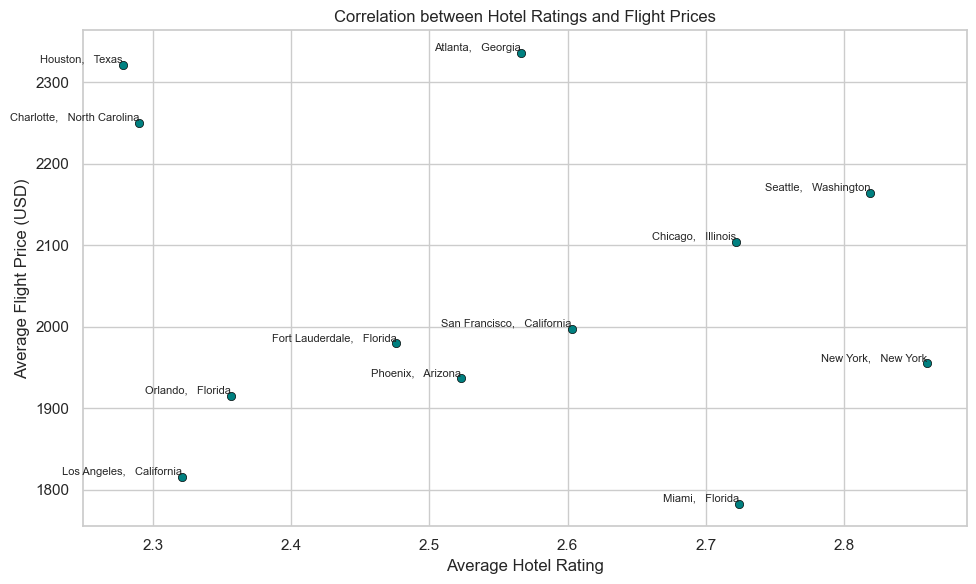

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numeric values
city_rating_table['HotelRatingNumeric'] = city_rating_table['AverageHotelRating'].astype(float)
city_rating_table['FlightPriceNumeric'] = city_rating_table['AverageFlightPrice'].replace(
    {'\$': '', ',': ''}, regex=True).astype(float)

# Set Seaborn style
sns.set(style='whitegrid')

# Plot setup
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=city_rating_table,
    x='HotelRatingNumeric',
    y='FlightPriceNumeric',
    color='teal',
    edgecolor='black'
)

# Add labels to each point
for i, row in city_rating_table.iterrows():
    plt.text(
        row['HotelRatingNumeric'],
        row['FlightPriceNumeric'],
        row['City_State'],
        fontsize=8,
        ha='right',
        va='bottom'
    )

# Axis labels and title
plt.xlabel('Average Hotel Rating')
plt.ylabel('Average Flight Price (USD)')
plt.title('Correlation between Hotel Ratings and Flight Prices')
plt.tight_layout()
plt.show()

In [38]:
import sqlite3
import pandas as pd

# Step 1: Define airport mapping
airport_to_city_state = {
    'ATL': 'Atlanta,   Georgia',
    'CLT': 'Charlotte,   North Carolina',
    'FLL': 'Fort Lauderdale,   Florida',
    'IAH': 'Houston,   Texas',
    'JFK': 'New York,   New York',
    'LAX': 'Los Angeles,   California',
    'MCO': 'Orlando,   Florida',
    'MIA': 'Miami,   Florida',
    'ORD': 'Chicago,   Illinois',
    'PHX': 'Phoenix,   Arizona',
    'SEA': 'Seattle,   Washington',
    'SFO': 'San Francisco,   California',
}
valid_cities = list(airport_to_city_state.values())

# Step 2: Add City, State column to flights_df
flights_df['City, State'] = flights_df['dest_airport_code'].map(airport_to_city_state)

# Step 3: Add City, State column to hotels_df
hotels_df['City, State'] = hotels_df[' cityName'].str.strip()

# Step 4: Count number of flights per city
flight_counts = flights_df['City, State'].value_counts().reset_index()
flight_counts.columns = ['City, State', 'Number of Flights']

# Step 5: Count number of hotels per city
hotel_counts = hotels_df['City, State'].value_counts().reset_index()
hotel_counts.columns = ['City, State', 'Number of Hotels']

# Step 6: Filter both to only valid cities
flight_counts = flight_counts[flight_counts['City, State'].isin(valid_cities)]
hotel_counts = hotel_counts[hotel_counts['City, State'].isin(valid_cities)]

# Step 7: Merge counts
flight_hotel_counts = pd.merge(flight_counts, hotel_counts, on='City, State', how='outer').fillna(0)
flight_hotel_counts['Number of Flights'] = flight_hotel_counts['Number of Flights'].astype(int)
flight_hotel_counts['Number of Hotels'] = flight_hotel_counts['Number of Hotels'].astype(int)

# Step 8: Save to SQLite
conn = sqlite3.connect("../data/vacation_data.db")
flight_hotel_counts.to_sql("city_counts", conn, if_exists="replace", index=False)

# Step 9: Preview the saved table
city_counts_preview = pd.read_sql_query("SELECT * FROM city_counts ORDER BY [City, State];", conn)
display(city_counts_preview)

# Step 10: Close connection
conn.close()

,"City, State",Number of Flights,Number of Hotels
0,"Atlanta, Georgia",15431,578
1,"Charlotte, North Carolina",15750,334
2,"Chicago, Illinois",18964,860
3,"Fort Lauderdale, Florida",16609,590
4,"Houston, Texas",19395,988
5,"Los Angeles, California",19200,1522
6,"Miami, Florida",16632,953
7,"New York, New York",17307,1161
8,"Orlando, Florida",17867,5523
9,"Phoenix, Arizona",16421,798


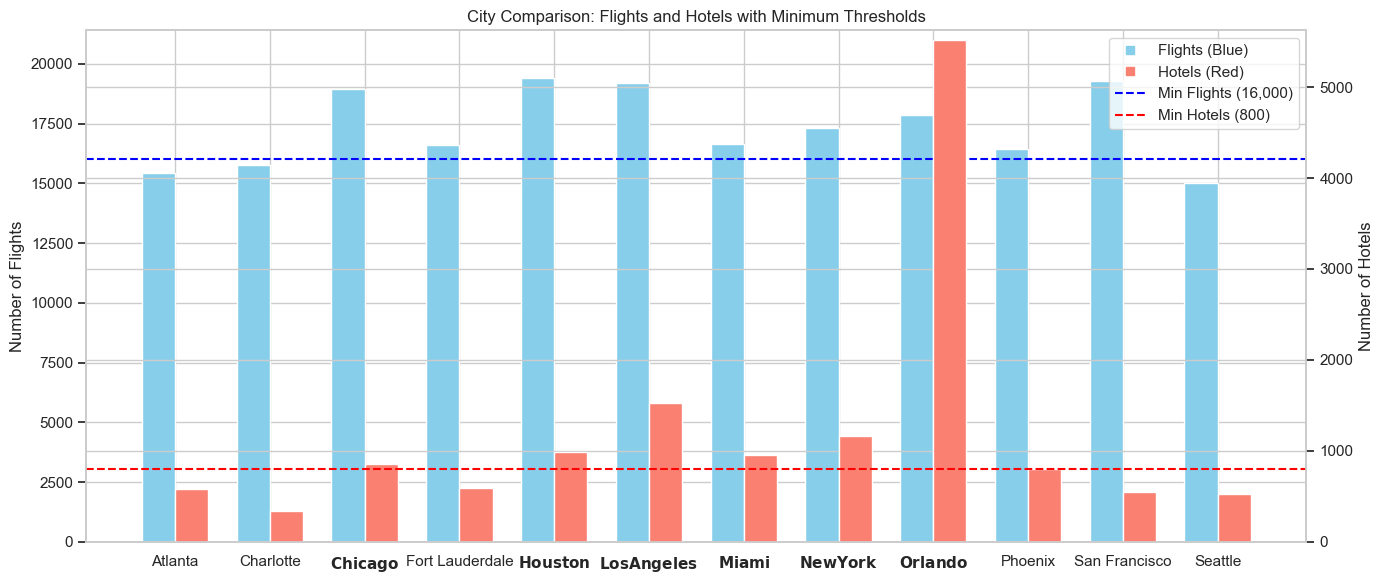

By looking at the graph, we can conclude the following cities meet our threshold: Los Angeles, New York, Houston, Miami, Chicago, Orlando


In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define threshold cities for bolding
qualified_cities = {'Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York', 'Orlando'}

# Extract just the city name
flight_hotel_counts['City'] = flight_hotel_counts['City, State'].apply(lambda x: x.split(',')[0])
flight_hotel_counts = flight_hotel_counts.sort_values('City')

cities = flight_hotel_counts['City']
x = np.arange(len(cities))
width = 0.35

# Create plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot flights
flights = flight_hotel_counts['Number of Flights']
bars1 = ax1.bar(x - width/2, flights, width, label='Flights (Blue)', color='skyblue')
ax1.set_ylabel('Number of Flights')
ax1.set_ylim(0, max(flights.max(), 16000) + 2000)
ax1.axhline(y=16000, color='blue', linestyle='--', label='Min Flights (16,000)')

# Plot hotels
ax2 = ax1.twinx()
hotels = flight_hotel_counts['Number of Hotels']
bars2 = ax2.bar(x + width/2, hotels, width, label='Hotels (Red)', color='salmon')
ax2.set_ylabel('Number of Hotels')
ax2.set_ylim(0, max(hotels.max(), 800) + 100)
ax2.axhline(y=800, color='red', linestyle='--', label='Min Hotels (800)')

# Set bold city names
xtick_labels = []
for city in cities:
    if city in qualified_cities:
        xtick_labels.append(f"$\\bf{{{city}}}$")  # Matplotlib LaTeX-style bold
    else:
        xtick_labels.append(city)

plt.xticks(ticks=x, labels=xtick_labels, rotation=45, ha='right')

# Title and custom legend
plt.title('City Comparison: Flights and Hotels with Minimum Thresholds')

flight_bar = plt.Line2D([], [], color='skyblue', marker='s', linestyle='None', label='Flights (Blue)')
hotel_bar = plt.Line2D([], [], color='salmon', marker='s', linestyle='None', label='Hotels (Red)')
flight_line = plt.Line2D([], [], color='blue', linestyle='--', label='Min Flights (16,000)')
hotel_line = plt.Line2D([], [], color='red', linestyle='--', label='Min Hotels (800)')

plt.legend(handles=[flight_bar, hotel_bar, flight_line, hotel_line], loc='upper right')

plt.tight_layout()
plt.show()

print("By looking at the graph, we can conclude the following cities meet our threshold: " + ", ".join(qualified_cities))

In [40]:
# Create numeric versions of the formatted columns
city_rating_table['HotelRatingNumeric'] = city_rating_table['AverageHotelRating'].astype(float)
city_rating_table['FlightPriceNumeric'] = city_rating_table['AverageFlightPrice'].replace(
    {'\$': '', ',': ''}, regex=True).astype(float)

# Top 3 highest hotel-rated cities
top_hotel_cities = city_rating_table.sort_values(
    by='HotelRatingNumeric', ascending=False
).head(3)[['City_State', 'AverageHotelRating']]

# Top 3 most affordable cities by flight
most_affordable_cities = city_rating_table.sort_values(
    by='FlightPriceNumeric', ascending=True
).head(3)[['City_State', 'AverageFlightPrice']]

# Display results
print("\n✈️ Top 3 Most Affordable Cities by Flight Price:")
display(most_affordable_cities)

print("🏨 Top 3 Cities by Hotel Rating:")
display(top_hotel_cities)

print("By looking at both datasets, we can conclude that Miami, Florida is the most compatible US city for the vacation package, meeting both thresholds for flight/hotel frequency and average values.")


✈️ Top 3 Most Affordable Cities by Flight Price:


,City_State,AverageFlightPrice
6,"Miami, Florida","$1,782.83"
5,"Los Angeles, California","$1,815.57"
8,"Orlando, Florida","$1,915.32"


🏨 Top 3 Cities by Hotel Rating:


,City_State,AverageHotelRating
7,"New York, New York",2.860
11,"Seattle, Washington",2.819
6,"Miami, Florida",2.724


By looking at both datasets, we can conclude that Miami, Florida is the most compatible US city for the vacation package, meeting both thresholds for flight/hotel frequency and average values.


### Step 3: Dive Deeper

This section takes the organized data to analyze patterns and identify a data-driven proposal.

In [41]:
# Filter flights dataset for Miami (MIA)
miami_flights = flights_df[flights_df['dest_airport_code'] == 'MIA'].copy()

# Filter hotels dataset for Miami, Florida
miami_hotels = hotels_df[hotels_df[' cityName'] == 'Miami,   Florida'].copy()

# Optional: Reset index for clean inspection
miami_flights.reset_index(drop=True, inplace=True)
miami_hotels.reset_index(drop=True, inplace=True)

# Preview the results
print("✈️ Flights to Miami:")
display(miami_flights)

print("\n🏨 Hotels in Miami:")
display(miami_hotels)

✈️ Flights to Miami:


,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date,"City, State"
0,ALG,Algeria,MIA,United States,Airbus A321neo|Boeing 747,LH,[Lufthansa],LH1317|LH1317,4/30/2022 12:35,5/1/2022 14:45,1870,1,601.0,USD,918000.0,957000.0,-4%,4/29/2022 17:52,"Miami, Florida"
1,ALG,Algeria,MIA,United States,Airbus A321neo|Airbus A321neo|Boeing 777,multi,[Lufthansa| SWISS],LH1317|LH1317|LH1317,4/30/2022 12:35,5/1/2022 17:15,2020,2,685.0,USD,1052000.0,957000.0,9%,4/29/2022 17:52,"Miami, Florida"
2,ALG,Algeria,MIA,United States,Airbus A330|Boeing 787,TK,[Turkish Airlines],TK652|TK652,4/30/2022 13:15,5/1/2022 6:00,1305,1,1095.0,USD,1093000.0,957000.0,14%,4/29/2022 17:52,"Miami, Florida"
3,ALG,Algeria,MIA,United States,Airbus A321neo|Airbus A320|Boeing 777,multi,[Lufthansa| SWISS],LH1317|LH1317|LH1317,4/30/2022 12:35,5/1/2022 17:15,2020,2,617.0,USD,1042000.0,957000.0,8%,4/29/2022 17:52,"Miami, Florida"
4,ALG,Algeria,MIA,United States,Airbus A321neo|Canadair RJ 900|Boeing 777,multi,[Lufthansa| SWISS],LH1317|LH1317|LH1317,4/30/2022 12:35,5/1/2022 17:15,2020,2,617.0,USD,1072000.0,957000.0,11%,4/29/2022 17:52,"Miami, Florida"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16627,DEL,India,MIA,United States,Boeing 777|Boeing 777|Boeing 737,multi,[KLM| Delta],KL872|KL872|KL872,8/28/2022 3:55,8/28/2022 23:19,1734,2,2866.0,USD,1529000.0,1411000.0,8%,4/29/2022 17:52,"Miami, Florida"
16628,DEL,India,MIA,United States,Boeing 777|Boeing 787-10|Boeing 737,multi,[KLM| Delta],KL872|KL872|KL872,8/28/2022 3:55,8/28/2022 23:19,1734,2,2905.0,USD,5156000.0,1411000.0,265%,4/29/2022 17:52,"Miami, Florida"
16629,DEL,India,MIA,United States,Boeing 787|Boeing 767|Airbus A320,multi,[Air India| United],AI161|AI161|AI161,8/28/2022 2:45,8/28/2022 19:44,1589,2,5416.0,USD,3893000.0,1411000.0,175%,4/29/2022 17:52,"Miami, Florida"
16630,DEL,India,MIA,United States,Boeing 787|Boeing 747,multi,[Air India| Lufthansa],AI121|AI121,8/28/2022 13:35,8/29/2022 14:45,2080,1,5709.0,USD,3700000.0,1411000.0,162%,4/29/2022 17:52,"Miami, Florida"



🏨 Hotels in Miami:


,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl,"City, State"
0,US,United States,128839,"Miami, Florida",1001591,Aloft Miami Doral,3,3265 NW 107th Avenue Doral 33172Florida,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Dolphin Mall</p><p>Location...,1-786-272-7272,Number of accessible parking spaces - 2 Wheelc...,25.803783|-80.369225,+17862727200,33172,http://www.aloftmiamidoral.com/,"Miami, Florida"
1,US,United States,128839,"Miami, Florida",1001592,Gale South Beach,4,1690 Collins Avenue Miami BeachFlorida,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Miami Beach Convention Cent...,1-305-728-0547,Beach towels Boat tours nearby Free bicycles o...,25.792204|-80.12981,1-305-673-0199,33139,http://galehotel.com,"Miami, Florida"
2,US,United States,128839,"Miami, Florida",1005508,Roney Palace Condo Luxury Rentals,4,2301 Collins Ave Miami BeachFlorida,Distances are displayed to the nearest 0.1 mil...,<p><b>Property Location</b> <br />With a stay ...,000 000 0000,Free WiFi Total number of rooms - 2,25.798780441|-80.127189636,9545589768,33139,http://www.roneypalacerealty.com/,"Miami, Florida"
3,US,United States,128839,"Miami, Florida",1005544,Miami Beach International Hostel,1,1051 Collins Avenue Miami BeachFL 33139,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Ocean Drive</p><p>Location ...,1-305-5345862,Wheelchair accessible  no Luggage storage Fre...,25.77951|-80.13277,1-305-5340268,33139,http://www.hostelmiamibeach.com/,"Miami, Florida"
4,US,United States,128839,"Miami, Florida",1008072,Shelborne South Beach,4,1801 Collins Avenue Miami BeachFlorida 33139,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Miami Beach Convention Cent...,1-305-531-2206,Parasailing nearby Breakfast available (surcha...,25.794074|-80.129431,1-305-5311271,33139,http://www.shelborne.com/,"Miami, Florida"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,US,United States,128839,"Miami, Florida",6110707,"Penthouse Studio Sleeps 4, On Miami Beach",3,6345 Collins Avenue,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : In Miami Beach (Mid Beach)</p><p...,NaN,Grocery/convenience store elevator Outdoor poo...,25.845406|-80.119887,1-9542901618,33141,NaN,"Miami, Florida"
949,US,United States,128839,"Miami, Florida",6110775,Seacoast by Miami Ambassadors,3,5101 Collins Ave,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Miami Beach Boardwalk</p><p...,NaN,Beach sun loungers Terrace ATM/banking Concier...,25.828024|-80.121311,1-3056089816,33140,NaN,"Miami, Florida"
950,US,United States,128839,"Miami, Florida",6111871,Penthouse Studio Ocean View on Miami Beach,4,6345 Collins Avenue,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : In Miami Beach (Mid Beach)</p><p...,NaN,Laundry facilities Grocery/convenience store F...,25.845406|-80.119887,1-9542901618,33141,NaN,"Miami, Florida"
951,US,United States,128839,"Miami, Florida",6111894,"Le Marina Bay 1105 - Condo 4 People, Sunny Isles",3,"18100 North Bay Road, #1105",Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Aventura Mall</p><p>Locatio...,NaN,Covered parking secured parking Wheelchair acc...,25.944462|-80.124535,1-866-446-4129,33160,NaN,"Miami, Florida"


### Step 4: Look for Specifics

Now that we are looking specifically in Miami, specify even further for affordable lights and luxury hotels.

In [42]:
# 1. Filter flights for all criteria
affordable_flights = miami_flights[
    (miami_flights['stops'] == 0) &
    (miami_flights['from_country'] != "United States") &
    (miami_flights['price'] < 200)
].copy()

# 2. Filter hotels for 5-star rating and name containing 'Beach'
luxury_hotels = miami_hotels[
    (miami_hotels[' HotelRating'] == 5) &
    (miami_hotels[' HotelName'].str.contains('Beach', case=False, na=False))
].copy()

# Optional: Reset index
affordable_flights.reset_index(drop=True, inplace=True)
luxury_hotels.reset_index(drop=True, inplace=True)

# Display results
print("✈️ Affordable Flights to Miami (Direct, International, Under $200):")
display(affordable_flights)

print("\n🏨 Luxury Hotels in Miami (5-Star, Beachfront):")
display(luxury_hotels)


✈️ Affordable Flights to Miami (Direct, International, Under $200):


,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date,"City, State"
0,BRU,Belgium,MIA,United States,Boeing 787,TB,[TUI fly],TB251,4/30/2022 9:50,4/30/2022 14:10,620,0,177.0,USD,747000.0,762000.0,-1%,4/29/2022 17:52,"Miami, Florida"
1,BRU,Belgium,MIA,United States,Boeing 787,TB,[TUI fly],TB251,5/14/2022 9:50,5/14/2022 14:10,620,0,177.0,USD,747000.0,762000.0,-1%,4/29/2022 17:52,"Miami, Florida"
2,YYZ,Canada,MIA,United States,Airbus A220-300 Passenger,AC,[Air Canada],AC1200,5/29/2022 7:50,5/29/2022 11:00,190,0,166.0,USD,199000.0,244000.0,-18%,4/29/2022 17:52,"Miami, Florida"
3,YYZ,Canada,MIA,United States,Airbus A220-300 Passenger,AC,[Air Canada],AC1204,5/29/2022 18:55,5/29/2022 22:05,190,0,166.0,USD,199000.0,244000.0,-18%,4/29/2022 17:52,"Miami, Florida"
4,YYZ,Canada,MIA,United States,Airbus A319,AA,[American],AA1572,5/29/2022 17:56,5/29/2022 21:25,209,0,189.0,USD,256000.0,244000.0,4%,4/29/2022 17:52,"Miami, Florida"
5,YYZ,Canada,MIA,United States,Airbus A319,AA,[American],AA2589,5/29/2022 6:00,5/29/2022 9:30,210,0,189.0,USD,256000.0,244000.0,4%,4/29/2022 17:52,"Miami, Florida"
6,BOG,Columbia,MIA,United States,Airbus A320neo,NK,[Spirit],NK3103,5/1/2022 12:05,5/1/2022 16:50,225,0,182.0,USD,210000.0,252000.0,-16%,4/29/2022 17:52,"Miami, Florida"
7,BOG,Columbia,MIA,United States,Airbus A320neo,NK,[Spirit],NK3103,5/3/2022 12:05,5/3/2022 16:50,225,0,160.0,USD,210000.0,252000.0,-16%,4/29/2022 17:52,"Miami, Florida"
8,BOG,Columbia,MIA,United States,Airbus A320neo,NK,[Spirit],NK3103,5/7/2022 12:05,5/7/2022 16:53,228,0,136.0,USD,210000.0,252000.0,-16%,4/29/2022 17:52,"Miami, Florida"
9,BOG,Columbia,MIA,United States,Airbus A320neo,NK,[Spirit],NK3103,5/15/2022 12:05,5/15/2022 16:53,228,0,124.0,USD,210000.0,252000.0,-16%,4/29/2022 17:52,"Miami, Florida"



🏨 Luxury Hotels in Miami (5-Star, Beachfront):


,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl,"City, State"
0,US,United States,128839,"Miami, Florida",1013602,The Tides South Beach,5,1220 Ocean Drive MIAMI BEACH,Florida Everglades: within 32186 metre Fort L...,This resort hotel enjoys a stunning setting on...,NaN,Hotel American Express JCB Diners Club MasterC...,25.783051|-80.130292,NaN,33139,http://www.tidessouthbeach.com/,"Miami, Florida"
1,US,United States,128839,"Miami, Florida",1021180,The Ritz Carlton South Beach,5,1 Lincoln Road Miami BeachFlorida 33139,NaN,"Stop at The Ritz-Carlton, South Beach to disco...",7869998878,languages spoken outdoor accessibility Interne...,25.7909251|-80.128964,1-786-2764000,33139,http://www.ritzcarlton.com/en/Properties/South...,"Miami, Florida"
2,US,United States,128839,"Miami, Florida",1112921,Soho Beach House,5,"Collins Avenue, 4385 MIAMI BEACH",NaN,"Soho Beach House is a private members club, ho...",NaN,Hotel American Express Diners Club MasterCard ...,25.8159174268081|-80.1224774052389,NaN,33140,http://www.sohobeachhouse.com,"Miami, Florida"
3,US,United States,128839,"Miami, Florida",1158897,W South Beach,5,2201 Collins Avenue Miami BeachFlorida 33139,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Miami Beach Convention Cent...,1-305-938-3005,Laundry facilities elevator Fitness facilities...,25.79727|-80.12746,1-305-938-3000,33139,http://www.wsouthbeach.com/,"Miami, Florida"
4,US,United States,128839,"Miami, Florida",1292275,1 Hotel South Beach,5,2341 Collins Avenue Miami BeachFlorida 33139,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Miami Beach Beaches</p><p>L...,1-305-604-6506,Tours/ticket assistance Accessible bathroom (i...,25.799213|-80.127638,1-833-625-3111,33139,http://www.1hotels.com/south-beach,"Miami, Florida"
5,US,United States,128839,"Miami, Florida",1304780,Sanctuary South Beach,5,1745 James Avenue MIAMI BEACH,NaN,Stunningly stylish suite accommodation where g...,NaN,Hotel Hairdryer TV Cable TV Fridge Microwave C...,25.793137|-80.130662,NaN,33139,http://sanctuarysobe.com/,"Miami, Florida"
6,US,United States,128839,"Miami, Florida",1336618,The Miami Beach Edition,5,2901 Collins Ave Miami BeachFlorida 33140,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : In Miami Beach (South Beach)</p>...,1-305-531-6461,Gift shops or newsstand Dry cleaning/laundry s...,25.805092|-80.12492,1-786-2574500,33140,http://www.marriott.com/hotels/travel/miaeb-th...,"Miami, Florida"
7,US,United States,128839,"Miami, Florida",1385029,Faena Hotel Miami Beach,5,3201 Collins Avenue Miami BeachFL 33140,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near 41st Street</p><p>Location ...,1-305-5348800,Dry cleaning/laundry service Shopping on site ...,25.807999|-80.12375,1-305-5348800,33140,http://www.faena.com,"Miami, Florida"
8,US,United States,128839,"Miami, Florida",1506355,Nobu Hotel Miami Beach,5,4525 Collins Avenue Miami BeachFlorida 33140,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Fontainebleau</p><p>Locatio...,1-305-6745509,Dry cleaning/laundry service Express check-in ...,25.81949|-80.12185,1-305-250-2204,33140,http://www.nobuedenroc.com/default-en.html,"Miami, Florida"
9,US,United States,128839,"Miami, Florida",1629680,The Retreat Collection at 1 Hotel South Beach,5,2341 Collins Avenue Miami BeachFlorida 33139,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Miami Beach Beaches</p><p>L...,1-305-6046950,Luggage storage Porter/bellhop 24-hour front d...,25.799658|-80.12749,+1 305 6046950,33139,https://www.1hotels.com/south-beach/retreat-co...,"Miami, Florida"


### Step 5: Summarize data to select flight and hotel

This section takes the filtered flights and hotels, looking for more specifics in extended data to make final selection.

In [43]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import plotly.graph_objects as go

# Assuming airport_to_city_state is defined and flights_df is loaded

# Get Miami airport code
miami_code = [k for k, v in airport_to_city_state.items() if "Miami" in v][0]
miami_flights = flights_df[flights_df['dest_airport_code'] == miami_code].copy()

# Extract month from arrival_time (assuming format starts with month digit)
miami_flights['arrival_month'] = miami_flights['arrival_time'].astype(str).str[0].astype(int)

# Aggregate monthly flight count and average price
monthly_summary = miami_flights.groupby('arrival_month').agg(
    flight_count=('arrival_month', 'count'),
    avg_price=('price', 'mean')
).reset_index()

# Create figure
fig = go.Figure()

# Add bar trace for flight count (primary y-axis)
fig.add_trace(
    go.Bar(
        x=monthly_summary['arrival_month'],
        y=monthly_summary['flight_count'],
        name='Number of Flights',
        marker_color='blue',
        yaxis='y1',
        hovertemplate='Month: %{x}<br>Flights: %{y}<extra></extra>'
    )
)

# Add line trace for average price (secondary y-axis)
fig.add_trace(
    go.Scatter(
        x=monthly_summary['arrival_month'],
        y=monthly_summary['avg_price'],
        name='Average Flight Price ($)',
        mode='lines+markers',
        marker_color='red',
        yaxis='y2',
        hovertemplate='Month: %{x}<br>Avg Price: $%{y:.2f}<extra></extra>'
    )
)

# Update layout to have two y-axes
fig.update_layout(
    title='Flights to Miami: Monthly Frequency and Price Trend',
    xaxis=dict(title='Arrival Month', dtick=1),
    yaxis=dict(
        title='Number of Flights',
        showgrid=False,
        rangemode='tozero'
    ),
    yaxis2=dict(
        title='Average Flight Price ($)',
        overlaying='y',
        side='right',
        rangemode='tozero'
    ),
    legend=dict(x=0.1, y=1.1, orientation='h'),
    bargap=0.2,
    template='plotly_white'
)

fig.show()

In [45]:
# Further filter flights for August departures (not limited to Boeing 787)
august_affordable_flights = affordable_flights[
    (affordable_flights['departure_time'].astype(str).str.startswith('8'))
].copy()

# Find the flight with the shortest duration
shortest_august_flight = august_affordable_flights.loc[
    august_affordable_flights['duration'].idxmin()
].copy()

# Display the result as a single-row DataFrame for context
display(pd.DataFrame([shortest_august_flight]))

# Print summary
print(
    f"According to our data, the most compatible direct international flight to Miami in August, "
    f"costing under $200 with the lowest duration time, is from: {shortest_august_flight['from_country']}"
)

,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date,"City, State"
12,BOG,Columbia,MIA,United States,Boeing 787,AV,[Avianca],AV126,8/28/2022 8:35,8/28/2022 13:10,215,0,178.0,USD,252000.0,252000.0,0%,4/29/2022 17:52,"Miami, Florida"


According to our data, the most compatible direct international flight to Miami in August, costing under $200 with the lowest duration time, is from: Columbia


In [46]:
for _, row in luxury_hotels.iterrows():
    print(f"Hotel Name: {row[' HotelName']}")
    print(f"Description:\n{row[' Description']}")
    print(f"Facilities:\n{row[' HotelFacilities']}")
    print("-" * 80)


Hotel Name: The Tides South Beach
Description:
This resort hotel enjoys a stunning setting on Ocean Drive. The resort is located just steps away from the shimmering, crystal-clear waters of the Atlantic Ocean. A number of exciting dining, shopping and nightlife venues can be found nearby. This resort is the ideal setting for South Beach holidays, offering business and leisure travellers comfort, convenience and a prime location. This hotel enjoys charming, Art Deco influences, exuding style and elegance. The guest rooms offer a comfortable setting in which to enjoy restful slumber. This hotel's exemplary service, first-class facilities and peaceful, homely atmosphere sets it apart as a prime option for visitors to the area.
Facilities:
Hotel American Express JCB Diners Club MasterCard Visa Visa Electrón Entertainment programme for adults Bathroom Entertainment programme for children Shower Bathtub Hairdryer Bathrobes Direct dial telephone TV Cable TV Radio Hi-fi DVD player Pay movies A

In [47]:
# Clean column names
luxury_hotels.columns = luxury_hotels.columns.str.strip()

# Filter for hotels that mention "multilingual" in the facilities
multilingual_hotels = luxury_hotels[
    luxury_hotels['HotelFacilities'].str.contains('multilingual', case=False, na=False)
].copy()

# Drop duplicates based on HotelName
multilingual_hotels = multilingual_hotels.drop_duplicates(subset='HotelName', keep='first')

# Optional: Reset index for clean display
multilingual_hotels.reset_index(drop=True, inplace=True)

# Preview the results
print("Hotels with Multilingual Staff (Distinct by HotelName):")
display(multilingual_hotels)

Hotels with Multilingual Staff (Distinct by HotelName):


,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl,"City, State"
0,US,United States,128839,"Miami, Florida",1158897,W South Beach,5,2201 Collins Avenue Miami BeachFlorida 33139,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Miami Beach Convention Cent...,1-305-938-3005,Laundry facilities elevator Fitness facilities...,25.79727|-80.12746,1-305-938-3000,33139,http://www.wsouthbeach.com/,"Miami, Florida"
1,US,United States,128839,"Miami, Florida",1292275,1 Hotel South Beach,5,2341 Collins Avenue Miami BeachFlorida 33139,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Miami Beach Beaches</p><p>L...,1-305-604-6506,Tours/ticket assistance Accessible bathroom (i...,25.799213|-80.127638,1-833-625-3111,33139,http://www.1hotels.com/south-beach,"Miami, Florida"
2,US,United States,128839,"Miami, Florida",1336618,The Miami Beach Edition,5,2901 Collins Ave Miami BeachFlorida 33140,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : In Miami Beach (South Beach)</p>...,1-305-531-6461,Gift shops or newsstand Dry cleaning/laundry s...,25.805092|-80.12492,1-786-2574500,33140,http://www.marriott.com/hotels/travel/miaeb-th...,"Miami, Florida"
3,US,United States,128839,"Miami, Florida",1385029,Faena Hotel Miami Beach,5,3201 Collins Avenue Miami BeachFL 33140,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near 41st Street</p><p>Location ...,1-305-5348800,Dry cleaning/laundry service Shopping on site ...,25.807999|-80.12375,1-305-5348800,33140,http://www.faena.com,"Miami, Florida"
4,US,United States,128839,"Miami, Florida",1506355,Nobu Hotel Miami Beach,5,4525 Collins Avenue Miami BeachFlorida 33140,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Fontainebleau</p><p>Locatio...,1-305-6745509,Dry cleaning/laundry service Express check-in ...,25.81949|-80.12185,1-305-250-2204,33140,http://www.nobuedenroc.com/default-en.html,"Miami, Florida"


In [48]:
# Filter for hotels that mention "multilingual" in the facilities
private_balcony_hotel = multilingual_hotels[
    multilingual_hotels['Description'].str.contains('private balconies', case=False, na=False)
].copy()

# Optional: Reset index for clean display
private_balcony_hotel.reset_index(drop=True, inplace=True)

# Preview the results
display(private_balcony_hotel)

print(f"According to our data, the most compatible 5-star beach hotel in Miami, complete with multilingual staff and private balconies is: {multilingual_hotels['HotelName'].iloc[0]}")

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl,"City, State"
0,US,United States,128839,"Miami, Florida",1158897,W South Beach,5,2201 Collins Avenue Miami BeachFlorida 33139,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Miami Beach Convention Cent...,1-305-938-3005,Laundry facilities elevator Fitness facilities...,25.79727|-80.12746,1-305-938-3000,33139,http://www.wsouthbeach.com/,"Miami, Florida"


According to our data, the most compatible 5-star beach hotel in Miami, complete with multilingual staff and private balconies is: W South Beach


### Step 6: Conclude

✈️ Flight from Bogotá to Miami
✅ Decision:
Select the direct flight from Bogotá, Colombia to Miami, costing under $200 and operating in August.

💡 Why:
International Origin: Bogotá meets the non-U.S. departure criteria.

Direct Flight: The selected flight has 0 stops, meeting comfort and efficiency standards.

Affordability: The price is under $200, offering exceptional value for an international route.

Timing: Departure occurs in August, aligning with peak vacation season.

Duration: It is the shortest duration among all matching flights, minimizing travel fatigue.

🏨 W South Beach Hotel in Miami
✅ Decision:
Book a stay at W South Beach, a 5-star beachfront hotel in South Beach, Miami.

💡 Why W South Beach Stands Out:
Luxury Standards: Rated 5 stars with premium amenities like multiple pools, spa services, beachfront access, and valet service.

Multilingual Staff: Ensures smooth guest communication for international travelers.

Private Balconies: Offers enhanced privacy and luxury views for all rooms.

Ideal Location: Steps from Collins Avenue and Miami Beach Convention Center.

Well-Rounded Amenities: Includes fitness, dining, business services, and eco-friendly policies.

Unique Value: Outperformed other 5-star options like Nobu or Faena in terms of guest services, personalized luxury, and multilingual support.

📊 Overall Insight
The data clearly indicates that:

Bogotá to Miami offers the best-value international direct flight under $200 in August.

W South Beach is the most compatible hotel for a premium, multilingual, beachfront stay that aligns with high-end traveler expectations.